In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
def _rescale_layout(pos, scale=1):
    # rescale to (-scale,scale) in all axes

    # shift origin to (0,0)
    lim = 0  # max coordinate for all axes
    for i in range(pos.shape[1]):
        pos[:, i] -= pos[:, i].mean()
        lim = max(pos[:, i].max(), lim)
    # rescale to (-scale,scale) in all directions, preserves aspect
    for i in range(pos.shape[1]):
        pos[:, i] *= scale / lim
    return pos

def chunks(lst, n, i=0, f=1):
    """Yield successive n-sized chunks from lst."""
    final = []
    while 1:
        t = lst[i:i + (f*n)]
        i += len(t)
        f += 1
        if len(t) > 0: final.append(t)
        else: break
    return final

def alternate_and_mix_pos(pos):
    z = list(range(pos.shape[0]))
    inter = int(round(((len(z)/2)-1)/2))
    i_0 = 0
    i_180 = int(round(len(z)/2))
    i_90 = i_0+inter
    i_270 = i_180+inter
    #print(inter,i_0,i_90,i_180,i_270)

    z_1 = list(reversed(z[i_90:i_270+1])) #reversed
    z_2 = z[i_270+1:]+z[i_0:i_90]
    q = np.array(list(zip(z_1,z_2))).flatten()
    a = np.array([x for x in z_1 if x not in q])
    #print(q)
    #print(a)
    if a.shape[0] > 0:
        q = np.append(q, a)
    b = np.array([x for x in z_2 if x not in q])
    #print(b)
    if b.shape[0] > 0:
        q = np.append(q, b)

    #print(q)

    q = np.array(q)
    #print(pos)
    pos = pos[q]
    #print(pos)
    return pos

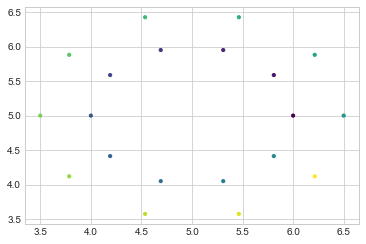

In [3]:
G = [1.0]*20
z = chunks(G, 10)

scale = 1
full_pos = None
for subz in z:
    center = np.array([5, 5])
    theta = np.linspace(0, 1, len(subz) + 1)[:-1] * 2 * np.pi
    theta = theta.astype(np.float32)
    pos = np.column_stack([np.cos(theta), np.sin(theta)])
    pos = _rescale_layout(pos, scale=scale) + center
    if full_pos is None: full_pos = pos
    else: full_pos = np.vstack((full_pos,pos))
    scale += 0.5
    
x,y = zip(*full_pos)

#plt.xlim(0, 100)
#plt.ylim(0, 100)
colors = np.array(range(len(x)))
plt.scatter(x, y, c=colors, cmap = 'viridis', s=10)

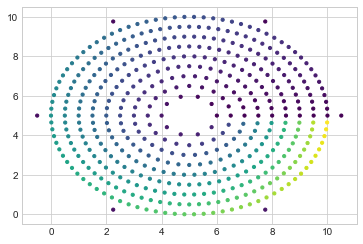

In [17]:
G = list(range(456))
z = chunks(G, 10)

scale = 1
full_pos = None
prevtot = 0
for subz in z:
    center = np.array([5, 5])
    theta = np.linspace(0, 1, len(subz) + 1)[:-1] * 2 * np.pi
    theta = theta.astype(np.float32)
    pos = np.column_stack([np.cos(theta), np.sin(theta)])
    pos = _rescale_layout(pos, scale=scale) + center
    pos = np.append(pos, np.array(range(pos.shape[0])).reshape(pos.shape[0],1), axis=1)
    #print(pos)
    pos = alternate_and_mix_pos(pos)
    #print(pos)
    prevtot += pos.shape[0]

    if full_pos is None: full_pos = pos
    else: full_pos = np.vstack((full_pos,pos))
    scale += 0.5
    
x,y,colors = zip(*full_pos)
#print(dict(zip(G,full_pos)))

#print(colors)
#plt.xlim(0, 100)
#plt.ylim(0, 100)
plt.scatter(x, y, c=colors, cmap = 'viridis', s=10) #RdPu



https://www.wolframalpha.com/input/?i=a*%28x*%28x%2B1%29%2F2%29+%3D+b

In [19]:
#a*(x*(x+1)/2) = b
a = 10
b = 456
#Only the positive solution make sense in this case
x = int(np.ceil((np.sqrt(a + 8*b) - np.sqrt(a))/(2*np.sqrt(a))))

x

10